In [17]:
import math
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from okama.assets import Asset, AssetList, Portfolio, approx_return_risk_adjusted
from okama.frontier import EfficientFrontier, EfficientFrontierReb, Plots
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### EF for rebalanced portfolio

In [19]:
l = ['SPY.US', 'GLD.US', '0165-70287767.RUFUND']

In [27]:
x = Plots(l, curr='RUB')

In [20]:
ef1 = EfficientFrontierReb(symbols=l, curr='RUB', period='Y')

In [21]:
ef2 = EfficientFrontierReb(symbols=l, curr='RUB', period='N')

In [22]:
df1 = ef1.ef_points

In [23]:
df2 = ef2.ef_points

C:\Users\Sergey\OneDrive\NoteBooks\okama\okama\frontier.py:300: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


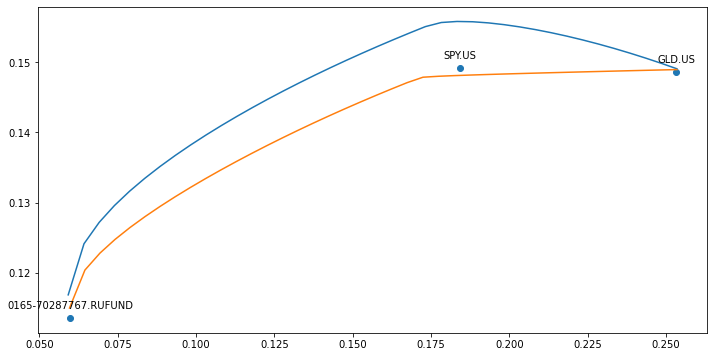

In [28]:
fig = plt.figure(figsize=(12,6))
#fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.axes()
ax.plot(df1.Risk, df1.CAGR)
ax.plot(df2.Risk, df2.CAGR)
#ax.plot(df.Risk, df['Return (risk adjusted approx)'])
#ax.plot(df.Risk, df.Return)
x.plot_assets(type='cagr')

In [89]:
ef2.max_return

0.06255878505885447


{'Weights': array([1.13242749e-13, 1.00000000e+00, 2.66349443e-14]),
 'CAGR': 0.14876820092229415,
 'Risk': 0.25395663879437363}

In [34]:
ef1.max_return

0.04483228438832076


{'Weights': array([4.87907220e-01, 5.12092780e-01, 2.28202082e-14]),
 'CAGR': 0.15613058290385662,
 'Risk': 0.18039757461537959}

In [90]:
ef2.gmv

(0.05958099443859356, 0.11480626676130656)

In [69]:
ef1.gmv

(0.059105592425563756, 0.11825260971638452)

In [78]:
ef1.gmv_weights 

array([0.04075501, 0.02019816, 0.93904683])

In [79]:
ef1.gmv

(0.059173629368737976, 0.1167914089163995)

In [84]:
ef1.max_return

0.0453516026582678


{'Weights': array([0.48790744, 0.51209256, 0.        ]),
 'CAGR': 0.15618599567473535,
 'Risk': 0.18251866216076934}

In [81]:
ef1.max_return

{'Weights': array([0.48790744, 0.51209256, 0.        ]),
 'CAGR': 0.15618599567473535,
 'Risk': 0.18042682163884025}

In [86]:
ef1._maximize_return(0.0453516026582678)

{'SPY.US': 0.4879059478001359,
 'GLD.US': 0.5120940521998639,
 '0165-70287767.RUFUND': 1.0722759485881639e-16,
 'CAGR': 0.15618599568253888,
 'Risk': 0.18251866485878068}

In [87]:
d = ef1.ef_points

In [91]:
у = ef2.ef_points

In [48]:
d.head()

,0165-70287767.RUFUND,CAGR,GLD.US,Risk,SPY.US
0,0.936328,0.116888,0.020842,0.059149,0.042831
1,0.790305,0.124679,0.065039,0.064212,0.144656
2,0.725492,0.127871,0.086576,0.069080,0.187932
3,0.673280,0.130337,0.104721,0.073934,0.221999
4,0.627255,0.132439,0.121272,0.078788,0.251473


C:\Users\Sergey\OneDrive\NoteBooks\okama\frontier.py:298: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.autoscale(enable=True, axis='y', tight=False)


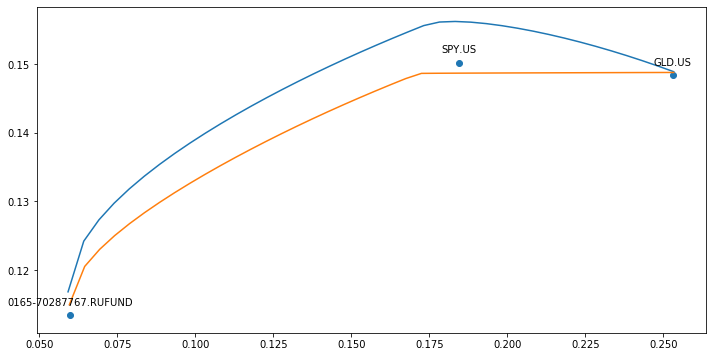

In [92]:
fig = plt.figure(figsize=(12,6))
#fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.axes()
ax.plot(d.Risk, d.CAGR)
ax.plot(у.Risk, у.CAGR)
#ax.plot(df.Risk, df['Return (risk adjusted approx)'])
#ax.plot(df.Risk, df.Return)
x.plot_assets(type='cagr')

In [17]:
df = ef1.ef_points

In [189]:
ef1._get_gmv_monthly()

(0.015415211788234092, 0.00939359002930298)

In [191]:
ef1.gmv

(0.059222218042090935, 0.11873315723636457)

In [128]:
ef1.gmv_weights

array([0.04320863, 0.01913376, 0.93765762])

In [129]:
ef1.max_return

{'weights': array([4.95360466e-01, 5.04639534e-01, 3.25814303e-15]),
 'cagr': 0.15375844963411578,
 'risk': 0.17917691695622873}

In [66]:
ef1.ror.std().max()

0.04514052908951162

In [74]:
df

,cagr,risk,weights
0,0.113706,0.060192,"[0.058241821952550864, 0.9417581780474492]"
1,0.118799,0.063365,"[0.16776862302374437, 0.8322313769762556]"
2,0.120795,0.066394,"[0.21499754674619484, 0.7850024532538051]"
3,0.122298,0.069407,"[0.2524465229818244, 0.7475534770181755]"
4,0.123551,0.072414,"[0.2850108830575181, 0.7149891169424819]"
5,0.124644,0.075419,"[0.3145582892492217, 0.6854417107507782]"
6,0.125625,0.078424,"[0.34203212279879025, 0.6579678772012097]"
7,0.126521,0.081431,"[0.3679845190249295, 0.6320154809750704]"
8,0.127349,0.084439,"[0.39276960474200767, 0.6072303952579924]"
9,0.128122,0.087449,"[0.41662955737181023, 0.5833704426281897]"


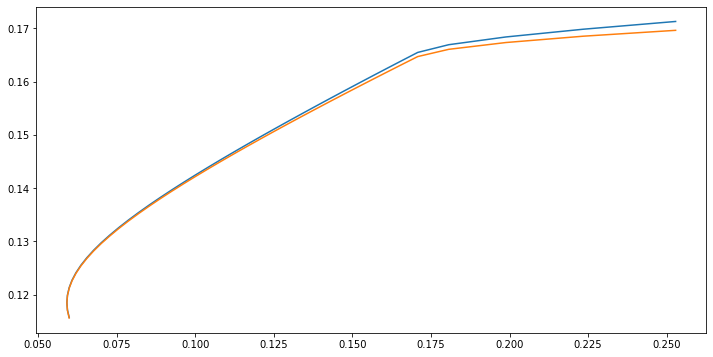

In [152]:
fig = plt.figure(figsize=(12,6))
#fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.axes()
ax.plot(d.Risk, d.Return)
ax.plot(d.Risk, d['Return (risk adjusted approx)'])
#eod.plot_assets(assets[list1])

### Efficient Frontier

In [23]:
ef = EfficientFrontier(symbols=['SPY.US', 'GLD.US', '0890-94127385.RUFUND', '0165-70287767.RUFUND'], first_date='2008-01', full_frontier=False).ef_points

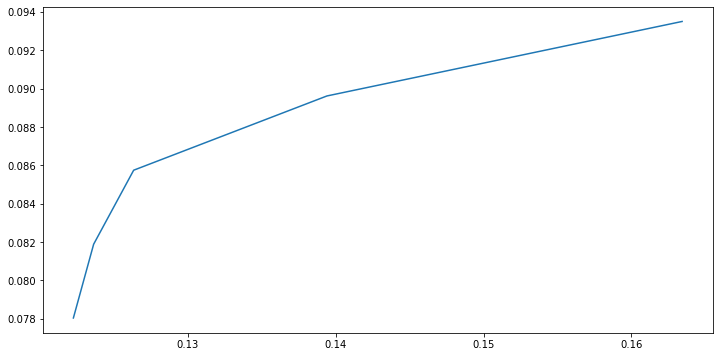

In [20]:
fig = plt.figure(figsize=(12,6))
#fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.axes()
ax.plot(ef.Risk, ef.Return)

In [11]:
ef = EfficientFrontier(symbols=['SPY.US', 'GLD.US', 'VNQ.US', 'BND.US']).ef_points

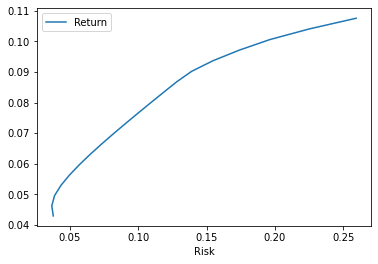

In [16]:
ef.plot(x='Risk', y='Return')